In [187]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [135]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [136]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [137]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Encoding

In [140]:
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

In [141]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [142]:
encoding = {
    'education': {'Graduate':1, 'Not Graduate': 0},
    'loan_status': {'Approved':1, 'Rejected':0}
}

In [143]:
df.replace(encoding, inplace=True)

In [144]:
df['self_employed'] = df['self_employed'].replace({'Yes': 1, 'No': 0})

In [145]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


# Separate features and target variables

In [147]:
x = df.drop(columns=['loan_id','loan_status'],axis=1)
y = df['loan_status']

In [148]:
num_cols = ['income_annum','loan_amount','loan_term','cibil_score','residential_assets_value',
'commercial_assets_value','luxury_assets_value','bank_asset_value']
scaler = StandardScaler()
x[num_cols] = scaler.fit_transform(df[num_cols])

In [149]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [150]:
x_train.shape

(3415, 11)

In [151]:
x_test.shape

(854, 11)

# ML Model

# Random forest Classifier

In [154]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [155]:
y_pred = model_rf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print(f"Accuracy of Random Forest Classifier: {accuracy:.2f}")

Accuracy of Random Forest Classifier: 97.66


In [156]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model_rf,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)

grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_

# Predictions and accuracy
y_pred_rf = best_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy of Tuned Random Forest Classifier: {accuracy_rf:.2f}%")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy of Tuned Random Forest Classifier: 98.01%


<Axes: xlabel='Importance', ylabel='Feature'>

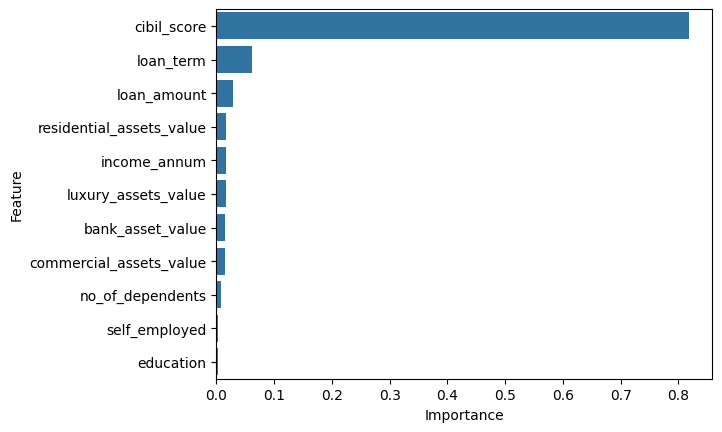

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
importance=model_rf.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
sns.barplot(data=feature_importance_df,x='Importance',y='Feature',orient = 'h')

In [158]:
feature_importance_df

,Feature,Importance
6,cibil_score,0.818004
5,loan_term,0.060938
4,loan_amount,0.029334
7,residential_assets_value,0.017441
3,income_annum,0.016326
9,luxury_assets_value,0.016146
10,bank_asset_value,0.015112
8,commercial_assets_value,0.014551
0,no_of_dependents,0.007718
2,self_employed,0.002289


# Logistic Regression

In [159]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression()

In [160]:
y_pred_lr = model_lr.predict(x_test)
accuracy_lr = accuracy_score(y_test,y_pred_lr)*100
print(f"Accuracy of Logistic Regression: {accuracy_lr}")

Accuracy of Logistic Regression: 90.5152224824356


In [161]:
report = classification_report(y_test,y_pred_lr)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



# KNN Classifier

In [163]:
parameters = {'n_neighbors':[3,5,6,7,8,9]}

model_knn = KNeighborsClassifier()
grid_search=GridSearchCV(model_knn,parameters,cv=5,return_train_score=False,scoring='f1')
grid_search.fit(x_train,y_train)
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009438,0.001973,0.058331,0.001428,3,{'n_neighbors': 3},0.891018,0.905615,0.933644,0.913753,0.911032,0.911012,0.013774,6
1,0.008394,0.000800,0.068373,0.008188,5,{'n_neighbors': 5},0.902527,0.916968,0.933644,0.930342,0.923619,0.921420,0.011051,3
2,0.008205,0.000400,0.153752,0.180329,6,{'n_neighbors': 6},0.901720,0.906832,0.932062,0.931242,0.920635,0.918498,0.012398,5
3,0.009398,0.001497,0.078641,0.005676,7,{'n_neighbors': 7},0.900360,0.912992,0.933644,0.930670,0.936170,0.922767,0.013842,2
4,0.009029,0.001068,0.080732,0.003961,8,{'n_neighbors': 8},0.902829,0.909988,0.936019,0.924731,0.930909,0.920895,0.012562,4
5,0.010598,0.001497,0.081480,0.014381,9,{'n_neighbors': 9},0.913043,0.917167,0.941589,0.930342,0.933174,0.927063,0.010522,1


In [164]:
grid_search.best_params_

{'n_neighbors': 9}

In [165]:
model_knn = KNeighborsClassifier(n_neighbors=9)
model_knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=9)

In [166]:
y_pred_knn = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn) *100
print(f"Accuracy of KNN Clasifier: {accuracy_knn}")

Accuracy of KNN Clasifier: 90.98360655737704


In [167]:
report = classification_report(y_test,y_pred_knn)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       318
           1       0.94      0.92      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.90       854
weighted avg       0.91      0.91      0.91       854



# Support Vector Machine

In [169]:
model=SVC()
parameter = {'kernel': ['poly','linear','rbf']}
grid_search=GridSearchCV(model,parameter,cv=5,return_train_score=False,scoring='f1')
grid_search.fit(x_train,y_train)
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.100674,0.010820,0.021706,0.003471,poly,{'kernel': 'poly'},0.935335,0.925620,0.927438,0.916571,0.944828,0.929958,0.009533,3
1,0.088034,0.003451,0.014233,0.000760,linear,{'kernel': 'linear'},0.932224,0.929440,0.950704,0.939502,0.952719,0.940918,0.009427,2
2,0.093640,0.007459,0.052419,0.003922,rbf,{'kernel': 'rbf'},0.944976,0.940893,0.955083,0.951016,0.966825,0.951758,0.008974,1


In [170]:
grid_search.best_params_

{'kernel': 'rbf'}

In [171]:
model_svm = SVC(kernel='rbf')
model_svm.fit(x_train,y_train)

SVC()

In [172]:
y_pred_svm = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test,y_pred_svm)*100
print(f"Accuracy of SVM: {accuracy_svm}")

Accuracy of SVM: 92.62295081967213


In [173]:
report = classification_report(y_test,y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       318
           1       0.95      0.93      0.94       536

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854



# Xgboost Classifier

In [175]:
model = XGBClassifier()
parameters = {'n_estimators' : [100,200,300,400]}
grid_search = GridSearchCV(model,parameters,cv=5,return_train_score=False,scoring='f1')
grid_search.fit(x_train, y_train)
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083620,0.015398,0.009009,0.001047,100,{'n_estimators': 100},0.985915,0.980024,0.991774,0.981043,0.987044,0.985160,0.004271,1
1,0.119166,0.008515,0.008602,0.000493,200,{'n_estimators': 200},0.985948,0.980070,0.990610,0.981043,0.983452,0.984225,0.003788,3
2,0.158130,0.018466,0.008001,0.000631,300,{'n_estimators': 300},0.984795,0.982374,0.990610,0.981043,0.982290,0.984222,0.003417,4
3,0.229856,0.027711,0.008511,0.000452,400,{'n_estimators': 400},0.984795,0.982374,0.990610,0.981043,0.983491,0.984463,0.003314,2


In [176]:
grid_search.best_params_

{'n_estimators': 100}

In [177]:
model_xg = XGBClassifier()
model_xg.fit(x_train, y_train)
y_pred_xg = model_xg.predict(x_test)

report = classification_report(y_test, y_pred_xg)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [178]:
accuracy_xg = accuracy_score(y_test,y_pred_xg)*100
print(f"Accuracy of XGBoost Classifier: {accuracy_xg}")

Accuracy of XGBoost Classifier: 98.24355971896955


In [179]:
model = ['Random Forest Classifier','Logistic Regression','KNN Classifier','Support Vectoer Machine','XGBoost Classifier']
accuracy = [accuracy,accuracy_lr,accuracy_knn,accuracy_svm,accuracy_xg]

In [180]:
model = ['Random Forest Classifier', 'Logistic Regression', 'KNN Classifier', 'Support Vector Machine', 'XGBoost Classifier']
accuracy = [accuracy_rf, accuracy_lr, accuracy_knn, accuracy_svm, accuracy_xg]

results_df = pd.DataFrame({
    'Model': model,
    'Accuracy (%)': accuracy
})


print(results_df)


                      Model  Accuracy (%)
0  Random Forest Classifier     98.009368
1       Logistic Regression     90.515222
2            KNN Classifier     90.983607
3    Support Vector Machine     92.622951
4        XGBoost Classifier     98.243560


In [181]:
final_model = best_rf

In [183]:
import joblib
joblib.dump(final_model, 'loan_status_predictor.pkl')

['loan_status_predictor.pkl']

# Prediction system

In [185]:
sample_data = pd.DataFrame({
    'no_of_dependents': [2],
    'education': [1],
    'self_employed': [0],
    'income_annum': [9600000],
    'loan_amount': [29900000],
    'loan_term': [12],
    'cibil_score': [778],
    'residential_assets_value': [2400000],
    'commercial_assets_value': [17600000],
    'luxury_assets_value': [22700000],
    'bank_asset_value': [8000000]
})

sample_data[num_cols] = scaler.transform(sample_data[num_cols])
loaded_model = joblib.load('loan_status_predictor.pkl')
prediction = loaded_model.predict(sample_data)

result = 'Loan Approved' if prediction[0] == 1 else 'Loan Not Approved'
print(f"\nPrediction Result: {result}")


Prediction Result: Loan Approved


In [186]:
joblib.dump(scaler, 'vector.pkl')

['vector.pkl']